# Results of Blastn Benchmarking

In [1]:
import math
from json import loads
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
blastn_bms = []

# List of file paths containing the benchmark runtime data
filepaths = ['./benchmark/blastn_runtimes_1718408655.txt',
             './benchmark/blastn_runtimes_1718534448.txt',
             './benchmark/blastn_runtimes_1718667156.txt']
# Iterate over each file path
for i,filepath in enumerate(filepaths):
    # Open the file in read mode
    with open(filepath, 'r') as file:
        for line in file:
            # Skip lines that start with "#"
            if not line.startswith("#"):
                # Split the line by ', ' and strip any extra whitespace
                temp = line.strip().split(', ')
                # Append the processed line data to the benchmark list
                blastn_bms.append([temp[0][2:-1], i, int(temp[2]), int(temp[3]), float(temp[4][:-1])])
# Convert the list to a pandas DataFrame and rename the columns
blastn_bms = pd.DataFrame(blastn_bms).rename(columns={0:"System", 1:"Run", 2:"n_cDNAs", 3:"len_query", 4:"runtime [s]"})

In [3]:
blastn_bms[:5]

,System,Run,n_cDNAs,len_query,runtime [s]
0,Spark,0,1,10,10.981172
1,Hadoop,0,1,10,56.162819
2,Spark,0,10,10,2.568046
3,Hadoop,0,10,10,51.223861
4,Spark,0,100,10,4.252468


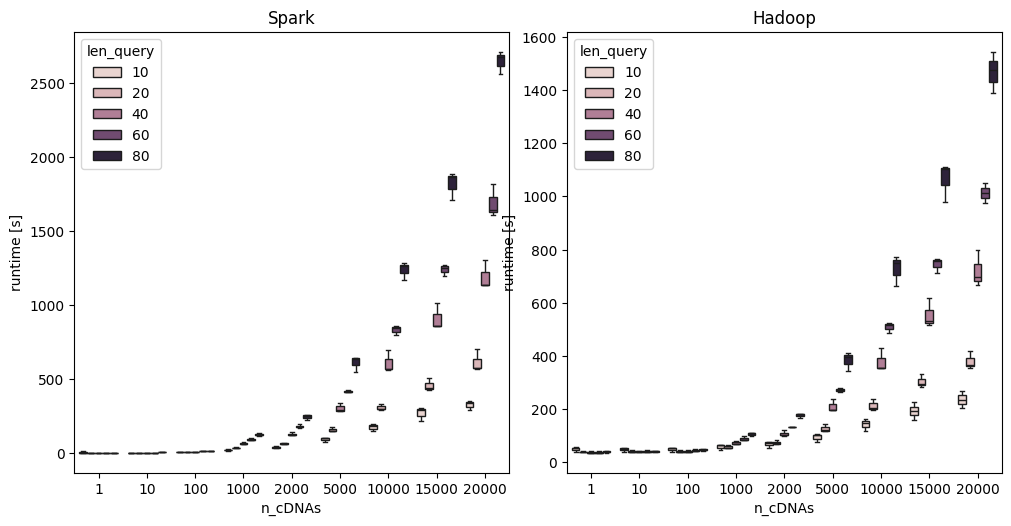

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
fig.tight_layout()

# Create a boxplot for Spark runtime data
sns.boxplot(x="n_cDNAs", y="runtime [s]",
            hue="len_query",
            data=blastn_bms.loc[blastn_bms["System"] == "Spark"],
            ax=axs[0])
axs[0].set_title('Spark')
# Create a boxplot for Hadoop runtime data
sns.boxplot(x="n_cDNAs", y="runtime [s]",
            hue="len_query",
            data=blastn_bms.loc[blastn_bms["System"] == "Hadoop"],
            ax=axs[1])
axs[1].set_title('Hadoop')
plt.show()


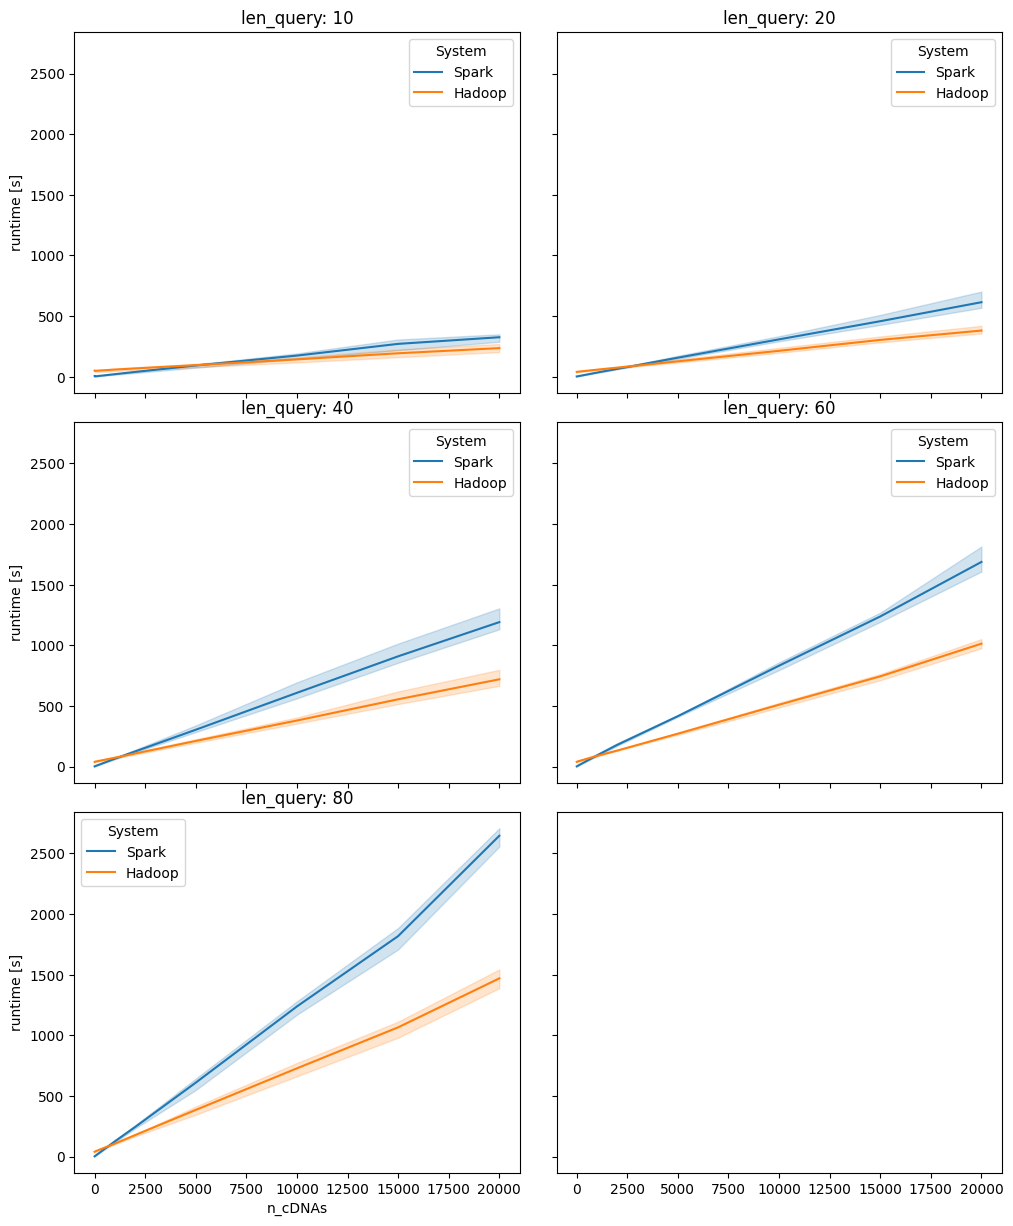

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(10,12))
fig.tight_layout()
# Iterate over the query lengths
for i,x in enumerate([10,20,40,60,80]):
    # Plot a lineplot for each query length
    sns.lineplot(x="n_cDNAs", y="runtime [s]",
            hue="System",
            data=blastn_bms.loc[blastn_bms["len_query"] == x], # Filter data for the current query length
            ax=axs[math.floor(i/2), i%2]) # Determine subplot position: row = i // 2, column = i % 2
    # Set the title for the current subplot
    axs[math.floor(i/2), i%2].set_title('len_query: ' + str(x))
plt.show()

# Results of Align Benchmarking

In [6]:
align_bms = []
# List of file paths containing the benchmark runtime data
filepaths = ['./benchmark/align_runtimes_1718492830.txt',
             './benchmark/align_runtimes_1718585244.txt']
# Iterate over each file path
for i,filepath in enumerate(filepaths):
    # Open the file in read mode
    with open(filepath, 'r') as file:
        for line in file:
            # Skip lines that start with "#"
            if not line.startswith("#"):
                # Split the line by ', ' and strip any extra whitespace
                temp = line.strip().split(', ')
                # Append the processed line data to the benchmark list
                align_bms.append([temp[0][2:-1], int(temp[1]), int(temp[2]), int(temp[3]), float(temp[4][:-1])])
# Convert the list to a pandas DataFrame and rename the columns
align_bms = pd.DataFrame(align_bms).rename(columns={0:"System", 1:"Run", 2:"n_cDNAs", 3:"n_Sequences", 4:"runtime [s]"})

In [7]:
align_bms[:5]

,System,Run,n_cDNAs,n_Sequences,runtime [s]
0,Spark,0,100,100,1656.993213
1,Hadoop,0,100,100,930.447590
2,Spark,0,100,80,1180.779609
3,Hadoop,0,100,80,752.488166
4,Spark,0,100,60,948.685476


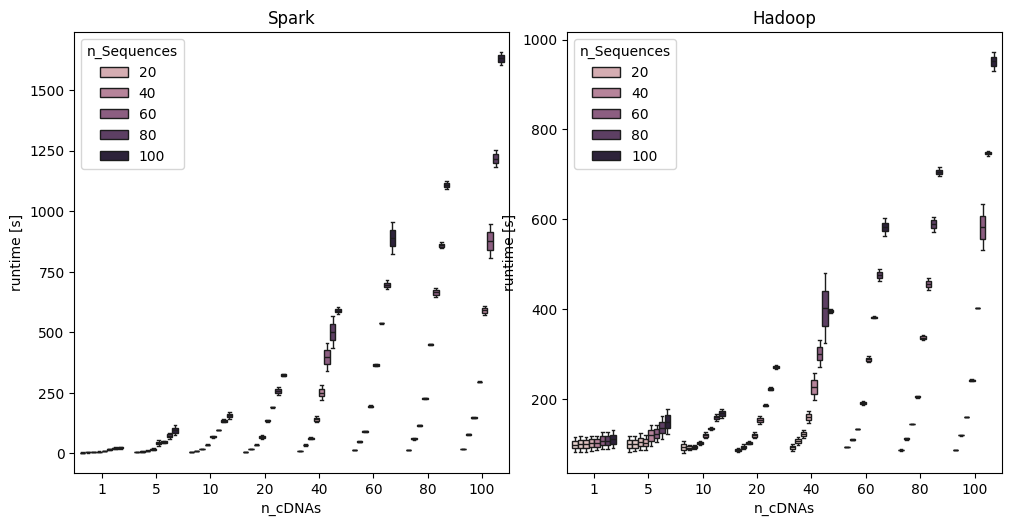

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
fig.tight_layout()
# Create a boxplot for Spark runtime data
sns.boxplot(x="n_cDNAs", y="runtime [s]",
            hue="n_Sequences",
            data=align_bms.loc[align_bms["System"] == "Spark"],
            ax=axs[0])
axs[0].set_title('Spark')
# Create a boxplot for Hadoop runtime data
sns.boxplot(x="n_cDNAs", y="runtime [s]",
            hue="n_Sequences",
            data=align_bms.loc[align_bms["System"] == "Hadoop"],
            ax=axs[1])
axs[1].set_title('Hadoop')
plt.show()




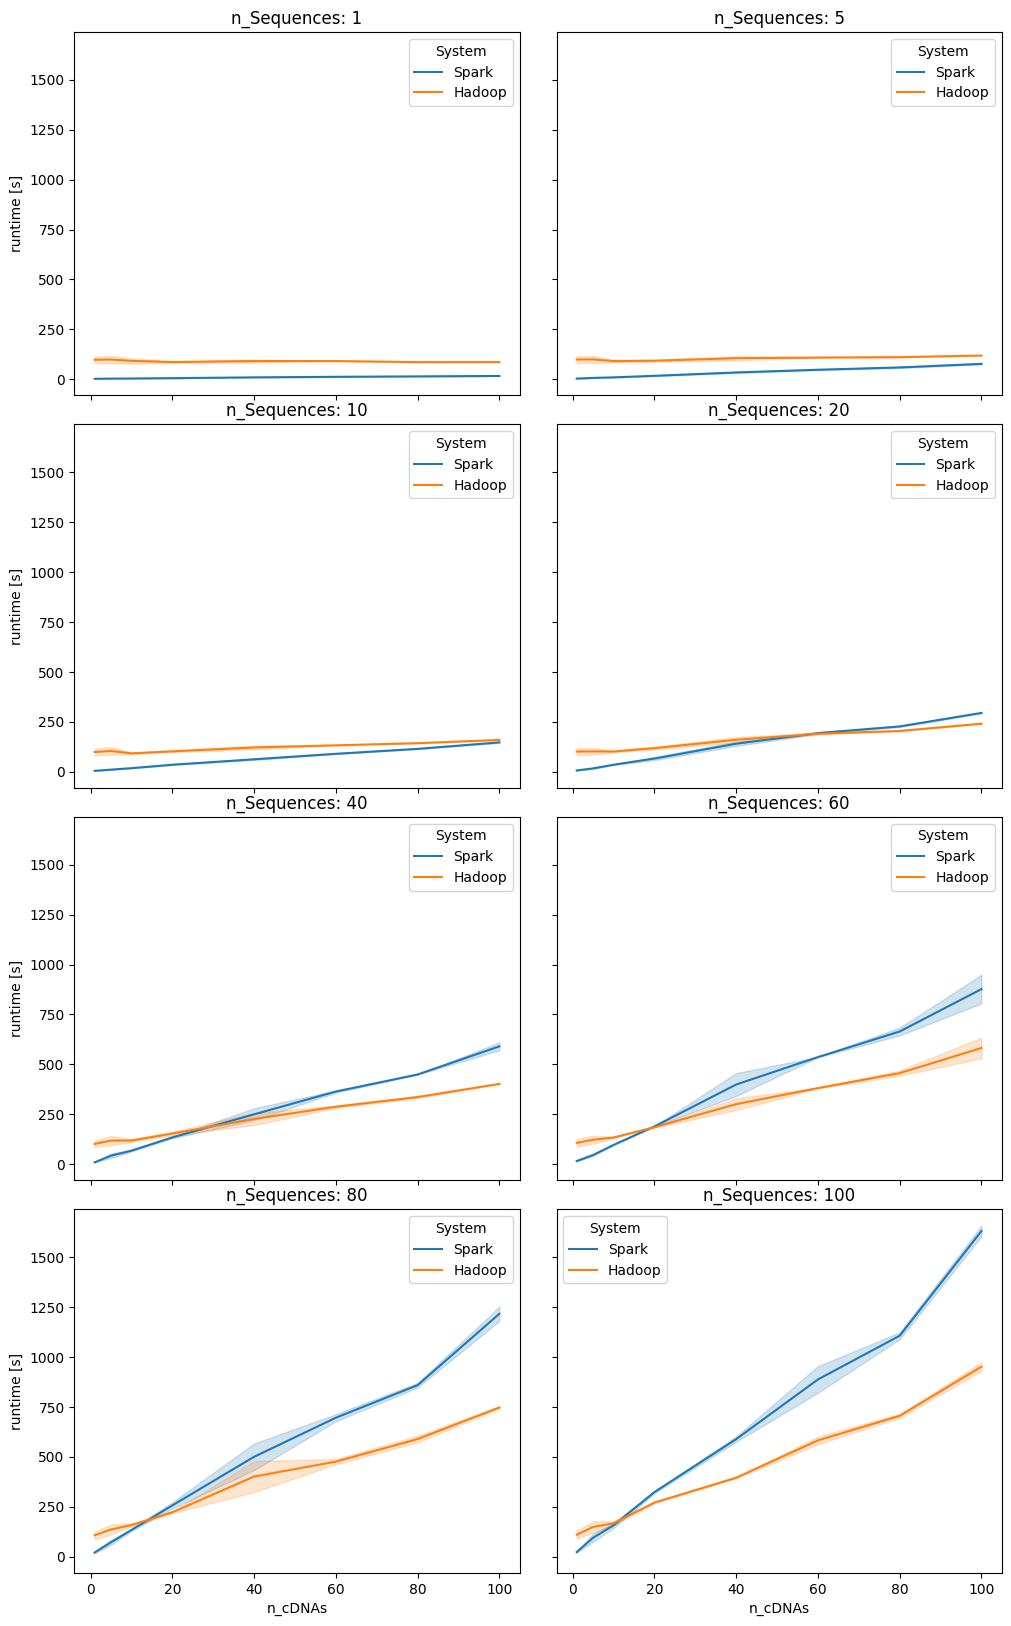

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(10,16))
fig.tight_layout()
# Iterate over the number of input sequences
for i,x in enumerate([1,5,10,20,40,60,80,100]):
    # Plot a lineplot for each number of input sequences
    sns.lineplot(x="n_cDNAs", y="runtime [s]",
            hue="System",
            data=align_bms.loc[align_bms["n_Sequences"] == x], # Filter data for the current number of input sequences
            ax=axs[math.floor(i/2), i%2]) # Determine subplot position: row = i // 2, column = i % 2
    # Set the title for the current subplot
    axs[math.floor(i/2), i%2].set_title('n_Sequences: ' + str(x))
plt.show()